In [1]:
import os
import sys

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive

In [4]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
cd gdrive

/content/gdrive


In [6]:
cd MyDrive

/content/gdrive/MyDrive


In [7]:
#mkdir XOi

In [8]:
cd XOi

/content/gdrive/MyDrive/XOi


In [9]:
ls

PrePostQuestions.csv


In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn
import torch
import nltk
#import neptune
#import streamlit
#import flask
#import TorchServe
#import tflite
#!pip install -r requirements
#nano README.md

# I.EAD

In [11]:
# DATA
# https://registry.opendata.aws/pre-post-purchase-questions/

#!wget https://pre-post-purchase-questions.s3.amazonaws.com/PrePostQuestions.csv

## 1.Distribution Check

In [12]:
df = pd.read_csv('PrePostQuestions.csv')

In [13]:
len(df)

232492

In [14]:
df.head(10)

asin                                           question  \
0  B017PICGL0                           Are boots cold reliable?   
1  B01HI8YEZS                is the main body rubber or plastic?   
2  B07GZ1LF4R   Do you know the thread pitch/count for the tang?   
3  B07BMNPRFN  The item ordered came tarnished and my son nee...   
4  B075QQKFK3  "I purchased these and now they look weird wit...   
5  B0189R9470    How long after placing order until US delivery?   
6  B07JFSCJB6  Wich one would you recommend to go with torque...   
7  B004QYME78            Will this fit a Stern Monopoly machine?   
8  B01N811J6K                  what year were these knives made?   
9  B019PJV3N4                      Is the power cord detachable?   

                                           item_name  hours_diff label  
0  Reebok Work Men's Zigkick RB7005 Work Shoe, Br...        -1.0   Pre  
1  3C-Aone Galaxy S5 Case,Mangix Built-in Glass L...        21.0   Pre  
2  ColdLand |14.00" Hand Forged Damascus Steel Bl...       166.0  Post  
3  BEICHUANG Beidou 7 Stars Big Dipper Star Penda...       116.0  Post  
4  Alla Lighting H8 H11 LED Bulbs Xtreme Super Br...      1021.0  Post  
5  Sport/Slim Reversible Waterproof Medical Alert...        -2.0   Pre  
6  MCWAUTO Android 9.0 Car GPS Stereo for Audi A4...        42.0  Post  
7  Game Room Guys Universal Pinball Ball Shooter ...       -39.0   Pre  
8  MTech USA MT-588BK Fixed Blade Neck Knife, Bla...         0.0   Pre  
9  AcuRite 75100 Large 18” Digital LED Wall Clock...       -16.0   Pre

In [15]:
# Label distribution
df.label.describe()

count     232492
unique         2
top          Pre
freq      134215
Name: label, dtype: object

In [16]:
fig = px.histogram(df, x='label', title='Distribution of Pre-Post label')
fig.show()

In [17]:
# Product distribution
len(df.asin.unique())

199884

In [18]:
len(df.item_name.unique())

198924

In [19]:
df.asin.describe()

count         232492
unique        199884
top       B079QHML21
freq             206
Name: asin, dtype: object

In [20]:
fig = px.histogram(df, x='asin', title='Distribution of Items')
fig.show()

In [21]:
# Get top 50 popular products
n = 50
pop_list = df.asin.value_counts()[:n].index.tolist()
df_top50 = pd.DataFrame()
for item in pop_list:
  mini_df = df[df.asin == item]
  df_top50 = df_top50.append(mini_df)

In [22]:
df_top50.head(10)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   
2706  B079QHML21  Any way to get the prime video menu to appear ...   
3285  B079QHML21                                 turn off subtitles   
3844  B079QHML21     how to key the = sign when keying in password?   
4569  B079QHML21  How do I access antenna tv? I have the hd ante...   
4820  B079QHML21        Will this also work with older firesticks,?   

                                              item_name  hours_diff label  
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre  
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre  
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre  
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre  
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre  
2706  Fire TV Stick 4K streaming device with Alexa b...       501.0  Post  
3285  Fire TV Stick 4K streaming device with Alexa b...    -10770.0   Pre  
3844  Fire TV Stick 4K streaming device with Alexa b...         8.0   Pre  
4569  Fire TV Stick 4K streaming device with Alexa b...       579.0  Post  
4820  Fire TV Stick 4K streaming device with Alexa b...      -683.0   Pre

In [23]:
fig = px.histogram(df_top50, x='asin', title='Distribution of top 50 Items')
fig.show()

In [24]:
# Check the most popular product
df_mini = df[df.asin == 'B079QHML21']
df_mini.head(10)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   
2706  B079QHML21  Any way to get the prime video menu to appear ...   
3285  B079QHML21                                 turn off subtitles   
3844  B079QHML21     how to key the = sign when keying in password?   
4569  B079QHML21  How do I access antenna tv? I have the hd ante...   
4820  B079QHML21        Will this also work with older firesticks,?   

                                              item_name  hours_diff label  
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre  
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre  
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre  
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre  
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre  
2706  Fire TV Stick 4K streaming device with Alexa b...       501.0  Post  
3285  Fire TV Stick 4K streaming device with Alexa b...    -10770.0   Pre  
3844  Fire TV Stick 4K streaming device with Alexa b...         8.0   Pre  
4569  Fire TV Stick 4K streaming device with Alexa b...       579.0  Post  
4820  Fire TV Stick 4K streaming device with Alexa b...      -683.0   Pre

In [25]:
fig = px.histogram(df_mini, x='label', title='Distribution of Label for Most Popular Item')
fig.show()

In [26]:
# Check the most popular product
df_mini = df[df.asin == pop_list[1]]
df_mini.head(10)
fig = px.histogram(df_mini, x='label', title='Distribution of Label for Second Popular Item')
fig.show()

## 2.Text Processing

In [27]:
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
# Remove special characters
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    result = re.sub(r"[^A-Za-z(),!?\'\`]", " ", text)
    return result

# Make all text lowercase
def text_lowercase(text):
    return text.lower()

# Remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = clean_text(text)
    text = text_lowercase(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [29]:
# Sample 1
test = df_mini.iloc[0].question
test

'Is this fire stick 4K?'

In [30]:
preprocessing(test)

'fire stick k'

In [31]:
# Sample
test = df_mini.iloc[1].question
test

'I have cable tv through cox communications.  can i use this remote to operate my dvr, etc?'

In [32]:
preprocessing(test)

'cable tv cox communication use remote operate dvr etc'

In [33]:
# Hypothesis: May be stopword matters?
# Verb tense - Target verbs (i.e. purchased, bought)
# Ref: https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
# Ref: https://github.com/michelledo94/Classifying-Amazon-product-reviews/blob/master/Classifiers.ipynb

In [34]:
# Process data of top 50 popular item 
df_top50.head(10)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   
2706  B079QHML21  Any way to get the prime video menu to appear ...   
3285  B079QHML21                                 turn off subtitles   
3844  B079QHML21     how to key the = sign when keying in password?   
4569  B079QHML21  How do I access antenna tv? I have the hd ante...   
4820  B079QHML21        Will this also work with older firesticks,?   

                                              item_name  hours_diff label  
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre  
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre  
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre  
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre  
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre  
2706  Fire TV Stick 4K streaming device with Alexa b...       501.0  Post  
3285  Fire TV Stick 4K streaming device with Alexa b...    -10770.0   Pre  
3844  Fire TV Stick 4K streaming device with Alexa b...         8.0   Pre  
4569  Fire TV Stick 4K streaming device with Alexa b...       579.0  Post  
4820  Fire TV Stick 4K streaming device with Alexa b...      -683.0   Pre

In [35]:
df_top50['clean_question'] = None
df_top50['len_question'] = None
df_top50['len_question_clean'] = None
for i in range(len(df_top50)):
  df_top50['clean_question'].iloc[i] = preprocessing(df_top50['question'].iloc[i])
  df_top50['len_question'].iloc[i] = len(df_top50['question'].iloc[i].split())
  df_top50['len_question_clean'].iloc[i] = len(df_top50['clean_question'].iloc[i].split())

df_top50_pre = df_top50[df_top50.label == 'Pre']
df_top50_post = df_top50[df_top50.label == 'Post']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_top50.head(10)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   
2706  B079QHML21  Any way to get the prime video menu to appear ...   
3285  B079QHML21                                 turn off subtitles   
3844  B079QHML21     how to key the = sign when keying in password?   
4569  B079QHML21  How do I access antenna tv? I have the hd ante...   
4820  B079QHML21        Will this also work with older firesticks,?   

                                              item_name  hours_diff label  \
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre   
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre   
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre   
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
2706  Fire TV Stick 4K streaming device with Alexa b...       501.0  Post   
3285  Fire TV Stick 4K streaming device with Alexa b...    -10770.0   Pre   
3844  Fire TV Stick 4K streaming device with Alexa b...         8.0   Pre   
4569  Fire TV Stick 4K streaming device with Alexa b...       579.0  Post   
4820  Fire TV Stick 4K streaming device with Alexa b...      -683.0   Pre   

                                         clean_question len_question  \
670                              work subscribe netflix            8   
807                          fire stick compatable tivo            7   
1979                      compatibility stereo receiver            5   
2070  prime video give option watch fire tv stick of...           24   
2146  know dumb question trying stream espn tv devic...           24   
2706  way get prime video menu appear top prime vide...           31   
3285                                      turn subtitle            3   
3844                           key sign keying password           10   
4569              access antenna tv hd antenna attached           12   
4820                         also work older firesticks            7   

     len_question_clean  
670                   3  
807                   4  
1979                  3  
2070                 15  
2146                 10  
2706                 17  
3285                  2  
3844                  4  
4569                  6  
4820                  4

In [37]:
fig = px.histogram(df_top50, x='len_question', color='label', title='Pre-processing Distribution of Question Len for Top 50 Popular Item')
fig.show()

In [38]:
fig = px.histogram(df_top50, x='len_question_clean', color='label', title='Post-processing Distribution of Question Len for Top 50 Popular Item')
fig.show()

In [39]:
df_top50

asin                                           question  \
670     B079QHML21          Will this work if I subscribe to netflix?   
807     B079QHML21            is the fire stick compatable with tivo?   
1979    B079QHML21              compatibility with my stereo receiver   
2070    B079QHML21  On prime video it gives the option to watch on...   
2146    B079QHML21  I know this is a dumb question but i’m trying ...   
...            ...                                                ...   
174271  B07FDLXW4N  is there a video on connecting camera to wifi,...   
194334  B07FDLXW4N  Can you set times for when the camera isn't ac...   
203418  B07FDLXW4N                     Morvilli Camera volume control   
214659  B07FDLXW4N  whats the default username password for the ca...   
217537  B07FDLXW4N                               Can it record motion   

                                                item_name  hours_diff label  \
670     Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
807     Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre   
1979    Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre   
2070    Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre   
2146    Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
...                                                   ...         ...   ...   
174271  [New 2019] FullHD 1080p WiFi Home Security Cam...        52.0  Post   
194334  [New 2019] FullHD 1080p WiFi Home Security Cam...        -1.0   Pre   
203418  [New 2019] FullHD 1080p WiFi Home Security Cam...        71.0  Post   
214659  [New 2019] FullHD 1080p WiFi Home Security Cam...        58.0  Post   
217537  [New 2019] FullHD 1080p WiFi Home Security Cam...       -17.0   Pre   

                                           clean_question len_question  \
670                                work subscribe netflix            8   
807                            fire stick compatable tivo            7   
1979                        compatibility stereo receiver            5   
2070    prime video give option watch fire tv stick of...           24   
2146    know dumb question trying stream espn tv devic...           24   
...                                                   ...          ...   
174271       video connecting camera wifi tried hour luck           17   
194334  set time camera isnt active dont want activate...           29   
203418                     morvilli camera volume control            4   
214659             whats default username password camera            8   
217537                                      record motion            4   

       len_question_clean  
670                     3  
807                     4  
1979                    3  
2070                   15  
2146                   10  
...                   ...  
174271                  7  
194334                 16  
203418                  4  
214659                  5  
217537                  2  

[1616 rows x 8 columns]

In [219]:
# After experiment, cleaning text actually degrade model's performance, I think because removing stopwords also removed important information.
# i.e. (will) mostly indicates that a pre-purchasing

## 3.Text Checking for top 50 items

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
original_words = nltk.word_tokenize(" ".join(df_top50['question'].tolist()))
original_words_pre = nltk.word_tokenize(" ".join(df_top50_pre['question'].tolist()))
original_words_post = nltk.word_tokenize(" ".join(df_top50_post['question'].tolist()))
clean_words = nltk.word_tokenize(" ".join(df_top50['clean_question'].tolist()))
clean_words_pre = nltk.word_tokenize(" ".join(df_top50_pre['clean_question'].tolist()))
clean_words_post = nltk.word_tokenize(" ".join(df_top50_post['clean_question'].tolist()))

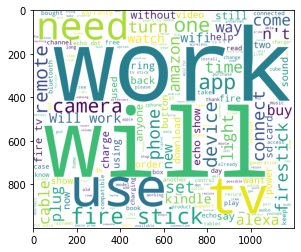

In [41]:
# Another visualization of distribtuion
# Word Cloud before processing
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(" ".join(original_words))
plt.imshow(wordcloud)

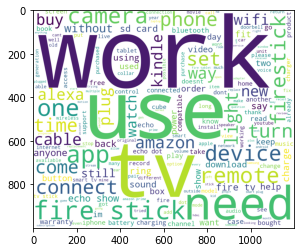

In [42]:
# Word Cloud after processing
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(" ".join(clean_words))
plt.imshow(wordcloud)

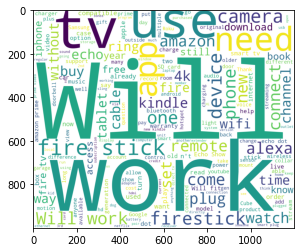

In [43]:
# Word Cloud before processing pre purschasing
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(" ".join(original_words_pre))
plt.imshow(wordcloud)

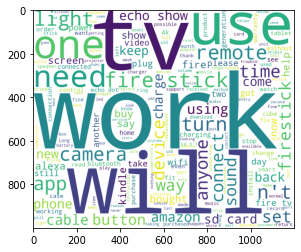

In [44]:
# Word Cloud before processing post purschasing
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(" ".join(original_words_post))
plt.imshow(wordcloud)

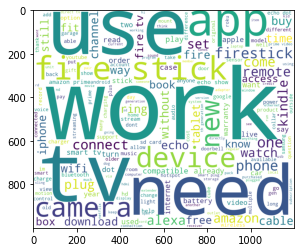

In [45]:
# Word Cloud after processing pre purschasing
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(" ".join(clean_words_pre))
plt.imshow(wordcloud)

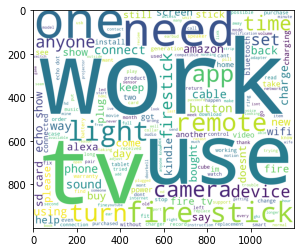

In [46]:
# Word Cloud after processing post purschasing
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(" ".join(clean_words_post))
plt.imshow(wordcloud)

## 4.Experiment & Preparation

### a. TF-IDF

In [47]:
# Ref: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# check n-gram
df_top50.head()

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   

                                              item_name  hours_diff label  \
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre   
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre   
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre   
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   

                                         clean_question len_question  \
670                              work subscribe netflix            8   
807                          fire stick compatable tivo            7   
1979                      compatibility stereo receiver            5   
2070  prime video give option watch fire tv stick of...           24   
2146  know dumb question trying stream espn tv devic...           24   

     len_question_clean  
670                   3  
807                   4  
1979                  3  
2070                 15  
2146                 10

In [48]:
# Bag of Words: Count occurance of word given vocab dictionary
# Draws back: vector may increase if new words appear => sparse matrix, no info on odering of words (n-gram could help)

In [198]:
# TF-IDF: Term-Freq + Inverse Doc Freq
# Count term freq in each doc, see docs with that term 
# If a term appears in many doc i.e. ("this") => not important
# If a term appears in one doc many times, but not other, it's more important i.e. product name

# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_top50['question'])
#data=cv.fit_transform(df_top50['question'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_top50.item_name
df_dtm.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



00  000  04  08  10  100  \
item_name                                                                      
Fire TV Stick 4K streaming device with Alexa bu...   0    0   0   0   0    0   
Fire TV Stick 4K streaming device with Alexa bu...   0    0   0   0   0    0   
Fire TV Stick 4K streaming device with Alexa bu...   0    0   0   0   0    0   

                                                    1000xm3s  1080  1080p  \
item_name                                                                   
Fire TV Stick 4K streaming device with Alexa bu...         0     0      0   
Fire TV Stick 4K streaming device with Alexa bu...         0     0      0   
Fire TV Stick 4K streaming device with Alexa bu...         0     0      0   

                                                    10oz  ...  yr  z3  zap  \
item_name                                                 ...                
Fire TV Stick 4K streaming device with Alexa bu...     0  ...   0   0    0   
Fire TV Stick 4K streaming device with Alexa bu...     0  ...   0   0    0   
Fire TV Stick 4K streaming device with Alexa bu...     0  ...   0   0    0   

                                                    zee  zero  zigbee  zinio  \
item_name                                                                      
Fire TV Stick 4K streaming device with Alexa bu...    0     0       0      0   
Fire TV Stick 4K streaming device with Alexa bu...    0     0       0      0   
Fire TV Stick 4K streaming device with Alexa bu...    0     0       0      0   

                                                    zone  zoom  zwave  
item_name                                                              
Fire TV Stick 4K streaming device with Alexa bu...     0     0      0  
Fire TV Stick 4K streaming device with Alexa bu...     0     0      0  
Fire TV Stick 4K streaming device with Alexa bu...     0     0      0  

[3 rows x 2906 columns]

In [199]:
from sklearn import preprocessing, metrics
encoder = preprocessing.LabelEncoder()
df_dtm['Label'] = encoder.fit_transform(df_top50.label)
df_dtm.Label.head() # => 1 is Pre and 0 is Post

item_name
Fire TV Stick 4K streaming device with Alexa built in, Dolby Vision, includes Alexa Voice Remote, latest release    1
Fire TV Stick 4K streaming device with Alexa built in, Dolby Vision, includes Alexa Voice Remote, latest release    1
Fire TV Stick 4K streaming device with Alexa built in, Dolby Vision, includes Alexa Voice Remote, latest release    1
Fire TV Stick 4K streaming device with Alexa built in, Dolby Vision, includes Alexa Voice Remote, latest release    1
Fire TV Stick 4K streaming device with Alexa built in, Dolby Vision, includes Alexa Voice Remote, latest release    1
Name: Label, dtype: int64

In [200]:
# Data preparation # Train # Test # Val
# split into train and test sets  
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_dtm[df_dtm.columns[:-1]], df_dtm.Label,
                                                                    test_size=0.3, random_state=1, shuffle=True)

# split into test and validation sets    
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test,
                                                                    test_size=1/2, random_state=1, shuffle=True)

In [201]:
x_train.shape

(1131, 2906)

In [53]:
y_train.shape

(1131,)

In [54]:
x_valid.shape

(242, 2407)

In [55]:
x_test.shape

(243, 2407)

In [56]:
df_dtm[df_dtm.columns[:-1]].head(3)

ab  abc  ability  able  \
item_name                                                                    
Fire TV Stick 4K streaming device with Alexa bu...   0    0        0     0   
Fire TV Stick 4K streaming device with Alexa bu...   0    0        0     0   
Fire TV Stick 4K streaming device with Alexa bu...   0    0        0     0   

                                                    ac  accelerated  accept  \
item_name                                                                     
Fire TV Stick 4K streaming device with Alexa bu...   0            0       0   
Fire TV Stick 4K streaming device with Alexa bu...   0            0       0   
Fire TV Stick 4K streaming device with Alexa bu...   0            0       0   

                                                    access  accessed  \
item_name                                                              
Fire TV Stick 4K streaming device with Alexa bu...       0         0   
Fire TV Stick 4K streaming device with Alexa bu...       0         0   
Fire TV Stick 4K streaming device with Alexa bu...       0         0   

                                                    accident  ...  youtubetv  \
item_name                                                     ...              
Fire TV Stick 4K streaming device with Alexa bu...         0  ...          0   
Fire TV Stick 4K streaming device with Alexa bu...         0  ...          0   
Fire TV Stick 4K streaming device with Alexa bu...         0  ...          0   

                                                    yr  zap  zee  zero  \
item_name                                                                
Fire TV Stick 4K streaming device with Alexa bu...   0    0    0     0   
Fire TV Stick 4K streaming device with Alexa bu...   0    0    0     0   
Fire TV Stick 4K streaming device with Alexa bu...   0    0    0     0   

                                                    zigbee  zinio  zone  zoom  \
item_name                                                                       
Fire TV Stick 4K streaming device with Alexa bu...       0      0     0     0   
Fire TV Stick 4K streaming device with Alexa bu...       0      0     0     0   
Fire TV Stick 4K streaming device with Alexa bu...       0      0     0     0   

                                                    zwave  
item_name                                                  
Fire TV Stick 4K streaming device with Alexa bu...      0  
Fire TV Stick 4K streaming device with Alexa bu...      0  
Fire TV Stick 4K streaming device with Alexa bu...      0  

[3 rows x 2407 columns]

### b. BERT Embedding

In [ ]:
#!pip install transformers
# Ref: https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/#why-bert-embeddings
# Embedding: Use a pretrained model to embedded text in to vector space, this case using BERT
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification, BertModel, BertTokenizer
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from transformers import BertTokenizer, BertForPreTraining, BertModel, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

In [ ]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
# tokenizer.to('cuda')
# Load pre-trained model (weights)
model = BertForPreTraining.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

model.to('cuda')
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

In [59]:
# Try to embed data, one example
# About output: https://huggingface.co/docs/transformers/model_doc/bert#bertmodel
inputs = tokenizer(df_top50.question.iloc[0], return_tensors='pt').to('cuda')
outputs = model(**inputs)

In [63]:
len(outputs.hidden_states) # (one for the output of the embeddings + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size)

13

In [64]:
df_top50.question.iloc[0]

'Will this work if I subscribe to netflix?'

In [65]:
outputs.hidden_states[3].shape # output 13 layer = 1 input layer + 12 outputs of BERT

torch.Size([1, 12, 768])

In [66]:
# Stack embedded space and reduce batch dimension
token_embeddings = torch.squeeze(torch.stack(outputs.hidden_states, dim=0), dim=1)
token_embeddings.shape

torch.Size([13, 12, 768])

In [67]:
# Get sentence vector
# `token_vecs` is a tensor with shape [12 x 768] for this example only
token_vecs = outputs.hidden_states[-2][0]

# Calculate the average of all 12 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

# Get these embedding and feed to the model
sentence_embedding.size()

torch.Size([768])

In [73]:
# Predict/Processing function
def pred(txt):
  inputs = tokenizer(txt, return_tensors='pt').to('cuda')
  outputs = model(**inputs)
  token_embeddings = torch.squeeze(torch.stack(outputs.hidden_states, dim=0), dim=1)
  token_vecs = outputs.hidden_states[-2][0]
  # for ref: averaging is just one of the method, can check more on http://jalammar.github.io/illustrated-bert/
  sentence_embedding = torch.mean(token_vecs, dim=0)
  # fix size of [1, 768] 
  return sentence_embedding

In [77]:
pred(df_top50.question.iloc[0]).shape

torch.Size([768])

In [72]:
df_top50['embedded'] = None
df_top50.head(5)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   

                                              item_name  hours_diff label  \
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre   
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre   
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre   
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   

                                         clean_question len_question  \
670                              work subscribe netflix            8   
807                          fire stick compatable tivo            7   
1979                      compatibility stereo receiver            5   
2070  prime video give option watch fire tv stick of...           24   
2146  know dumb question trying stream espn tv devic...           24   

     len_question_clean embedded  
670                   3     None  
807                   4     None  
1979                  3     None  
2070                 15     None  
2146                 10     None

In [102]:
# Create embedded data of question for whole dataset
for i in range(len(df_top50)):
  df_top50.embedded.iloc[i] = pred(df_top50.question.iloc[i]).detach().cpu().numpy()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
df_top50.head(5)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   

                                              item_name  hours_diff label  \
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre   
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre   
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre   
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   

                                         clean_question len_question  \
670                              work subscribe netflix            8   
807                          fire stick compatable tivo            7   
1979                      compatibility stereo receiver            5   
2070  prime video give option watch fire tv stick of...           24   
2146  know dumb question trying stream espn tv devic...           24   

     len_question_clean                                           embedded  
670                   3  [0.61361754, -0.3479931, 0.46900153, 0.1069836...  
807                   4  [0.07237665, -0.33556747, 0.07080703, 0.096959...  
1979                  3  [0.015473302, -0.3282498, 0.07744863, 0.080599...  
2070                 15  [0.4521373, -0.3451836, 0.63776594, 0.23904407...  
2146                 10  [0.3889884, 0.0048327865, 0.48219085, 0.130723...

In [168]:
df_embbed_raw = df_top50[['embedded','label']]

In [169]:
df_embbed_raw['Label'] = encoder.fit_transform(df_embbed_raw.label) # Pre is 0 and Post is 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
df_embbed_raw

embedded label  Label
670     [0.61361754, -0.3479931, 0.46900153, 0.1069836...   Pre      1
807     [0.07237665, -0.33556747, 0.07080703, 0.096959...   Pre      1
1979    [0.015473302, -0.3282498, 0.07744863, 0.080599...   Pre      1
2070    [0.4521373, -0.3451836, 0.63776594, 0.23904407...   Pre      1
2146    [0.3889884, 0.0048327865, 0.48219085, 0.130723...   Pre      1
...                                                   ...   ...    ...
174271  [0.14947355, -0.23326805, 0.559088, -0.1141304...  Post      0
194334  [0.2756381, -0.13852943, 0.18091589, -0.096299...   Pre      1
203418  [-0.18517879, -0.049078543, 0.35886467, 0.1828...  Post      0
214659  [-0.07630129, -0.13726123, 0.23685674, 0.02497...  Post      0
217537  [0.10199304, -0.0044379234, -0.20095061, -0.07...   Pre      1

[1616 rows x 3 columns]

In [175]:
df_embbed = pd.DataFrame(x for x in df_embbed_raw['embedded'])
df_embbed['Label'] = encoder.fit_transform(df_embbed_raw.label)
df_embbed

0         1         2         3         4         5         6  \
0     0.613618 -0.347993  0.469002  0.106984  0.454199 -0.402516 -0.087441   
1     0.072377 -0.335567  0.070807  0.096960  0.423739  0.073479 -0.482005   
2     0.015473 -0.328250  0.077449  0.080600  0.344625 -0.295966 -0.110012   
3     0.452137 -0.345184  0.637766  0.239044  0.625617 -0.558497  0.030347   
4     0.388988  0.004833  0.482191  0.130723  0.439489 -0.234589 -0.090720   
...        ...       ...       ...       ...       ...       ...       ...   
1611  0.149474 -0.233268  0.559088 -0.114130  0.677641 -0.479857 -0.070774   
1612  0.275638 -0.138529  0.180916 -0.096299  0.607146 -0.279212 -0.252647   
1613 -0.185179 -0.049079  0.358865  0.182880  0.823400  0.120840 -0.127387   
1614 -0.076301 -0.137261  0.236857  0.024978  0.534911  0.006691 -0.316316   
1615  0.101993 -0.004438 -0.200951 -0.075400  0.555200 -0.118738 -0.217934   

             7         8         9  ...       759       760       761  \
0     0.248156  0.051099 -0.072584  ... -0.308191  0.202145 -0.152440   
1     0.124776 -0.434640 -0.094973  ...  0.144709  0.240872 -0.174443   
2     0.208816  0.280898 -0.023278  ... -0.073958  0.276874 -0.027482   
3     0.627240 -0.239996 -0.267230  ... -0.348351  0.039167  0.100869   
4     0.440527  0.218805 -0.172577  ... -0.290210  0.354563 -0.427729   
...        ...       ...       ...  ...       ...       ...       ...   
1611  0.829659 -0.504560 -0.320057  ... -0.274393 -0.150703 -0.026835   
1612  0.550152 -0.101102 -0.209665  ... -0.367008  0.294469 -0.083849   
1613  0.080077 -0.500219 -0.437227  ... -0.027280  0.100742 -0.163626   
1614  0.306282 -0.269967  0.293866  ... -0.204263  0.474283 -0.485672   
1615  0.449270 -0.662280 -0.239073  ... -0.219229  0.337388 -0.138724   

           762       763       764       765       766       767  Label  
0     0.282033  0.646797 -0.235678 -0.355433  0.100896  0.070561      1  
1     0.399212  0.266604 -0.268557 -0.324375  0.019006  0.137597      1  
2     0.319316  0.400469  0.146137 -0.145164 -0.273081  0.188187      1  
3     0.296855  0.403169 -0.269212 -0.369202 -0.059623 -0.049685      1  
4     0.090251  0.433084 -0.125991  0.098759  0.228963  0.283772      1  
...        ...       ...       ...       ...       ...       ...    ...  
1611  0.199402  0.271421 -0.271154 -0.558375  0.206261  0.036263      0  
1612  0.215142  0.339009 -0.034119 -0.280742 -0.182059 -0.097673      1  
1613  0.442458  0.470990 -0.181819 -0.353916 -0.301447 -0.121557      0  
1614 -0.110611  0.348178 -0.255851 -0.611017  0.269961  0.322090      0  
1615  0.209512  0.410444 -0.015929 -0.028795 -0.065498  0.213352      1  

[1616 rows x 769 columns]

In [179]:
# Data preparation # Train # Test # Val
# split into train and test sets  
x_train_e, x_test_e, y_train_e, y_test_e = model_selection.train_test_split(df_embbed[df_embbed.columns[:-1]], df_embbed.Label,
                                                                    test_size=0.3, random_state=1, shuffle=True)
#x_train_e = np.expand_dims(x_train_e, axis = 1)
#x_test_e = np.expand_dims(x_test_e, axis = 1)

# split into test and validation sets    
x_valid_e, x_test_e, y_valid_e, y_test_e = model_selection.train_test_split(x_test_e, y_test_e,
                                                                    test_size=1/2, random_state=1, shuffle=True)

In [180]:
x_train_e.shape

(1131, 768)

In [184]:
y_train_e.shape

(1131,)

### c. Product Grouping

In [195]:
# Grouping items that are close to each other, extract important subject in text or do clustering embedding space
# Could alse use raw embedding (without clustering)
df_top50.head(5)

asin                                           question  \
670   B079QHML21          Will this work if I subscribe to netflix?   
807   B079QHML21            is the fire stick compatable with tivo?   
1979  B079QHML21              compatibility with my stereo receiver   
2070  B079QHML21  On prime video it gives the option to watch on...   
2146  B079QHML21  I know this is a dumb question but i’m trying ...   

                                              item_name  hours_diff label  \
670   Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   
807   Fire TV Stick 4K streaming device with Alexa b...      -424.0   Pre   
1979  Fire TV Stick 4K streaming device with Alexa b...       -43.0   Pre   
2070  Fire TV Stick 4K streaming device with Alexa b...     -9846.0   Pre   
2146  Fire TV Stick 4K streaming device with Alexa b...        -1.0   Pre   

                                         clean_question len_question  \
670                              work subscribe netflix            8   
807                          fire stick compatable tivo            7   
1979                      compatibility stereo receiver            5   
2070  prime video give option watch fire tv stick of...           24   
2146  know dumb question trying stream espn tv devic...           24   

     len_question_clean                                           embedded  
670                   3  [0.61361754, -0.3479931, 0.46900153, 0.1069836...  
807                   4  [0.07237665, -0.33556747, 0.07080703, 0.096959...  
1979                  3  [0.015473302, -0.3282498, 0.07744863, 0.080599...  
2070                 15  [0.4521373, -0.3451836, 0.63776594, 0.23904407...  
2146                 10  [0.3889884, 0.0048327865, 0.48219085, 0.130723...

In [196]:
# Create embedded data of question for whole dataset
df_top50['embedded_prod'] = None
for i in range(len(df_top50)):
  df_top50.embedded_prod.iloc[i] = pred(df_top50.item_name.iloc[i]).detach().cpu().numpy()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
df_embbed_raw = df_top50[['embedded', 'embedded_prod', 'label']]
df_embbed_raw

embedded  \
670     [0.61361754, -0.3479931, 0.46900153, 0.1069836...   
807     [0.07237665, -0.33556747, 0.07080703, 0.096959...   
1979    [0.015473302, -0.3282498, 0.07744863, 0.080599...   
2070    [0.4521373, -0.3451836, 0.63776594, 0.23904407...   
2146    [0.3889884, 0.0048327865, 0.48219085, 0.130723...   
...                                                   ...   
174271  [0.14947355, -0.23326805, 0.559088, -0.1141304...   
194334  [0.2756381, -0.13852943, 0.18091589, -0.096299...   
203418  [-0.18517879, -0.049078543, 0.35886467, 0.1828...   
214659  [-0.07630129, -0.13726123, 0.23685674, 0.02497...   
217537  [0.10199304, -0.0044379234, -0.20095061, -0.07...   

                                            embedded_prod label  
670     [-0.20202248, 0.0100894105, 1.0060334, -0.0295...   Pre  
807     [-0.20202248, 0.0100894105, 1.0060334, -0.0295...   Pre  
1979    [-0.20202248, 0.0100894105, 1.0060334, -0.0295...   Pre  
2070    [-0.20202248, 0.0100894105, 1.0060334, -0.0295...   Pre  
2146    [-0.20202248, 0.0100894105, 1.0060334, -0.0295...   Pre  
...                                                   ...   ...  
174271  [0.01134367, 0.037930157, 0.9438237, -0.147079...  Post  
194334  [0.01134367, 0.037930157, 0.9438237, -0.147079...   Pre  
203418  [0.01134367, 0.037930157, 0.9438237, -0.147079...  Post  
214659  [0.01134367, 0.037930157, 0.9438237, -0.147079...  Post  
217537  [0.01134367, 0.037930157, 0.9438237, -0.147079...   Pre  

[1616 rows x 3 columns]

In [224]:
# Create full embedding data
df_embbed_q = pd.DataFrame(x for x in df_embbed_raw['embedded'])
df_embbed_p =  pd.DataFrame(x for x in df_embbed_raw['embedded_prod'])
df_full = pd.concat([df_embbed_q, df_embbed_p], axis = 1)
df_full['Label'] = encoder.fit_transform(df_embbed_raw.label)

In [238]:
df_full

0         1         2         3         4         5         6  \
0     0.613618 -0.347993  0.469002  0.106984  0.454199 -0.402516 -0.087441   
1     0.072377 -0.335567  0.070807  0.096960  0.423739  0.073479 -0.482005   
2     0.015473 -0.328250  0.077449  0.080600  0.344625 -0.295966 -0.110012   
3     0.452137 -0.345184  0.637766  0.239044  0.625617 -0.558497  0.030347   
4     0.388988  0.004833  0.482191  0.130723  0.439489 -0.234589 -0.090720   
...        ...       ...       ...       ...       ...       ...       ...   
1611  0.149474 -0.233268  0.559088 -0.114130  0.677641 -0.479857 -0.070774   
1612  0.275638 -0.138529  0.180916 -0.096299  0.607146 -0.279212 -0.252647   
1613 -0.185179 -0.049079  0.358865  0.182880  0.823400  0.120840 -0.127387   
1614 -0.076301 -0.137261  0.236857  0.024978  0.534911  0.006691 -0.316316   
1615  0.101993 -0.004438 -0.200951 -0.075400  0.555200 -0.118738 -0.217934   

             7         8         9  ...       759       760       761  \
0     0.248156  0.051099 -0.072584  ... -0.540642 -0.137510 -0.280244   
1     0.124776 -0.434640 -0.094973  ... -0.540642 -0.137510 -0.280244   
2     0.208816  0.280898 -0.023278  ... -0.540642 -0.137510 -0.280244   
3     0.627240 -0.239996 -0.267230  ... -0.540642 -0.137510 -0.280244   
4     0.440527  0.218805 -0.172577  ... -0.540642 -0.137510 -0.280244   
...        ...       ...       ...  ...       ...       ...       ...   
1611  0.829659 -0.504560 -0.320057  ... -0.173955  0.193088 -0.286924   
1612  0.550152 -0.101102 -0.209665  ... -0.173955  0.193088 -0.286924   
1613  0.080077 -0.500219 -0.437227  ... -0.173955  0.193088 -0.286924   
1614  0.306282 -0.269967  0.293866  ... -0.173955  0.193088 -0.286924   
1615  0.449270 -0.662280 -0.239073  ... -0.173955  0.193088 -0.286924   

           762       763       764       765       766       767  Label  
0     0.385222  0.256227  0.091671 -0.582013 -0.150312 -0.125073      1  
1     0.385222  0.256227  0.091671 -0.582013 -0.150312 -0.125073      1  
2     0.385222  0.256227  0.091671 -0.582013 -0.150312 -0.125073      1  
3     0.385222  0.256227  0.091671 -0.582013 -0.150312 -0.125073      1  
4     0.385222  0.256227  0.091671 -0.582013 -0.150312 -0.125073      1  
...        ...       ...       ...       ...       ...       ...    ...  
1611  0.305938  0.221488 -0.281618 -0.589701 -0.244282 -0.346577      0  
1612  0.305938  0.221488 -0.281618 -0.589701 -0.244282 -0.346577      1  
1613  0.305938  0.221488 -0.281618 -0.589701 -0.244282 -0.346577      0  
1614  0.305938  0.221488 -0.281618 -0.589701 -0.244282 -0.346577      0  
1615  0.305938  0.221488 -0.281618 -0.589701 -0.244282 -0.346577      1  

[1616 rows x 1537 columns]

In [244]:
# Data preparation # Train # Test # Val
# split into train and test sets  
x_train_q, x_test_q, y_train_q, y_test_q = model_selection.train_test_split(df_full.iloc[:,:-1], df_full.Label,
                                                                    test_size=0.3, random_state=1, shuffle=True)

# split into test and validation sets    
x_valid_q, x_test_q, y_valid_q, y_test_q = model_selection.train_test_split(x_test_q, y_test_q,
                                                                    test_size=1/2, random_state=1, shuffle=True)

In [245]:
x_train_q.iloc[0]

0      0.457085
1     -0.436387
2      0.018281
3      0.361403
4      0.613812
         ...   
763    0.256227
764    0.091671
765   -0.582013
766   -0.150312
767   -0.125073
Name: 58, Length: 1536, dtype: float32

## 5.Full Dataset

# II.Training & Benchmarking

In [94]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_label):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(predictions, valid_label)

## 1.Initial Models & TF-IDF & Raw Data & Top 50 Popular Products

In [202]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression model with default hyperparameters
clf = LogisticRegression(random_state=0)
print("Logistics Regression, TF-IDF accuracy: ", train_model(clf, x_train, y_train, x_valid, y_valid))

Logistics Regression, TF-IDF accuracy:  0.6776859504132231


In [203]:
from sklearn.svm import SVC
# SVM model with default hyperparameters
svm = SVC(gamma = 'scale', kernel= 'sigmoid') # default gamma has been set to 'scale' in the latest version of sklearn
print("SVM, TF-IDF accuracy: ", train_model(svm, x_train, y_train, x_valid, y_valid))

SVM, TF-IDF accuracy:  0.6611570247933884


In [204]:
from sklearn.neighbors import KNeighborsClassifier

# kNN model with default parameters 
knn = KNeighborsClassifier(n_neighbors = 3)
print("kNN, TF-IDF accuracy: ", train_model(knn, x_train, y_train, x_valid, y_valid))

kNN, TF-IDF accuracy:  0.5454545454545454


In [205]:
from sklearn.ensemble import RandomForestClassifier

# RF model with default parameters 
rf = RandomForestClassifier(max_depth=20, random_state=0)
print("Random Forest, TF-IDF accuracy: ", train_model(rf, x_train, y_train, x_valid, y_valid))

Random Forest, TF-IDF accuracy:  0.6570247933884298


In [206]:
import xgboost

# XGBoost model with default parameters 
xgb = xgboost.XGBClassifier()
print("XGBoost, TF-IDF accuracy: ", train_model(xgb, x_train, y_train, x_valid, y_valid))

XGBoost, TF-IDF accuracy:  0.6115702479338843


In [207]:
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost SKLearn model with default parameters 
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
print("XGBoost, TF-IDF accuracy: ", train_model(xgb, x_train, y_train, x_valid, y_valid))

XGBoost, TF-IDF accuracy:  0.6115702479338843


In [ ]:
# Connect to neptune
# 0. Raw Data Vectorized + Normal Model
# 1. Processed Data Vectorized + Normal Model
# 2. Embedded Data + Normal Model
# 3. Embedded Data + Meta Model
# 4. Embedded Categorized Data + Meta Model
# 5. Auto Train/Test for all settings above
# 6. Can do Random Search or Grid Search
# 7. Cross validation

In [ ]:
# Random Forest - Try to make each word a variable, to pick the most important

## 2.Initial Models & Embedded & Raw Data & Top 50 Popular Products

In [186]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression model with default hyperparameters
clf = LogisticRegression(random_state=0)
print("Logistics Regression, TF-IDF accuracy: ", train_model(clf, x_train_e, y_train_e, x_valid_e, y_valid_e))

Logistics Regression, TF-IDF accuracy:  0.6611570247933884


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [188]:
from sklearn.svm import SVC
# SVM model with default hyperparameters
svm = SVC(gamma = 'scale', kernel= 'sigmoid') # default gamma has been set to 'scale' in the latest version of sklearn
print("SVM, TF-IDF accuracy: ", train_model(svm, x_train_e, y_train_e, x_valid_e, y_valid_e))

SVM, TF-IDF accuracy:  0.6818181818181818


In [189]:
from sklearn.neighbors import KNeighborsClassifier

# kNN model with default parameters 
knn = KNeighborsClassifier(n_neighbors = 3)
print("kNN, TF-IDF accuracy: ", train_model(knn, x_train_e, y_train_e, x_valid_e, y_valid_e))

kNN, TF-IDF accuracy:  0.6033057851239669


In [190]:
from sklearn.ensemble import RandomForestClassifier

# RF model with default parameters 
rf = RandomForestClassifier(max_depth=20, random_state=0)
print("Random Forest, TF-IDF accuracy: ", train_model(rf, x_train_e, y_train_e, x_valid_e, y_valid_e))

Random Forest, TF-IDF accuracy:  0.6570247933884298


In [192]:
import xgboost

# XGBoost model with default parameters 
xgb = xgboost.XGBClassifier()
print("XGBoost, TF-IDF accuracy: ", train_model(xgb, x_train_e, y_train_e, x_valid_e, y_valid_e))

XGBoost, TF-IDF accuracy:  0.6694214876033058


In [193]:
from sklearn.ensemble import GradientBoostingClassifier # much more slower

# XGBoost SKLearn model with default parameters 
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
print("XGBoost, TF-IDF accuracy: ", train_model(xgb, x_train_e, y_train_e, x_valid_e, y_valid_e))

XGBoost, TF-IDF accuracy:  0.6487603305785123


## 3.Initial Models & Grouping & Raw Data & Top 50 Popular Product

In [246]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression model with default hyperparameters
clf = LogisticRegression(random_state=0)
print("Logistics Regression, TF-IDF accuracy: ", train_model(clf, x_train_q, y_train_q, x_valid_q, y_valid_q))

Logistics Regression, TF-IDF accuracy:  0.6570247933884298


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [247]:
from sklearn.svm import SVC
# SVM model with default hyperparameters
svm = SVC(gamma = 'scale', kernel= 'sigmoid') # default gamma has been set to 'scale' in the latest version of sklearn
print("SVM, TF-IDF accuracy: ", train_model(svm, x_train_q, y_train_q, x_valid_q, y_valid_q))

SVM, TF-IDF accuracy:  0.6942148760330579


In [248]:
from sklearn.neighbors import KNeighborsClassifier

# kNN model with default parameters 
knn = KNeighborsClassifier(n_neighbors = 3)
print("kNN, TF-IDF accuracy: ", train_model(knn, x_train_q, y_train_q, x_valid_q, y_valid_q))

kNN, TF-IDF accuracy:  0.6074380165289256


In [249]:
from sklearn.ensemble import RandomForestClassifier

# RF model with default parameters 
rf = RandomForestClassifier(max_depth=20, random_state=0)
print("Random Forest, TF-IDF accuracy: ", train_model(rf, x_train_q, y_train_q, x_valid_q, y_valid_q))

Random Forest, TF-IDF accuracy:  0.6446280991735537


In [250]:
import xgboost

# XGBoost model with default parameters 
xgb = xgboost.XGBClassifier()
print("XGBoost, TF-IDF accuracy: ", train_model(xgb, x_train_e, y_train_e, x_valid_e, y_valid_e))

XGBoost, TF-IDF accuracy:  0.6694214876033058


In [251]:
from sklearn.ensemble import GradientBoostingClassifier # much more slower

# XGBoost SKLearn model with default parameters 
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
print("XGBoost, TF-IDF accuracy: ", train_model(xgb, x_train_e, y_train_e, x_valid_e, y_valid_e))

XGBoost, TF-IDF accuracy:  0.6487603305785123


## 4.Visualization

# III.Deploying